# APP RATING PREDICTION PROJECT

In [1]:
import pandas as pd

In [2]:
# Load the CSV
df = pd.read_csv("F:/Python/Projects/App Rating Prediction/googleplaystore.csv")

In [3]:
# Shape (rows, columns)
print("Shape:", df.shape)

Shape: (10841, 13)


In [4]:
# First 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Column datatypes
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
# Count of Column datatypes
df.dtypes.value_counts()

object     12
float64     1
Name: count, dtype: int64

In [7]:
# Null values per column
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [8]:
# Drop rows with ANY null values
df_clean = df.dropna()

In [9]:
# New shape
print("Shape after dropping nulls:", df_clean.shape)

Shape after dropping nulls: (9360, 13)


In [10]:
# Save Progress (Optional but recommended)
# df_clean.to_csv("F:/Simplilearn/Python/Projects/App Rating Prediction/googleplaystore_clean.csv", index=False)
# print("Clean dataset saved as googleplaystore_clean.csv")

In [11]:
# Make a copy
df_clean = df_clean.copy()

In [12]:
# to see the top record of 'Size' (one specific) Column
df_clean[["Size"]].head(10)

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
5,5.6M
6,19M
7,29M
8,33M
9,3.1M


In [13]:
# to see the middle record of 'Size' (one specific) Column
df_clean[["Size"]].iloc[190:200] # not including the upper limit

,Size
201,Varies with device
202,Varies with device
203,Varies with device
204,Varies with device
205,55M
206,3.2M
207,Varies with device
208,Varies with device
209,23k
210,16M


In [14]:
# To count how many unique values in a column
df_clean['Size'].nunique()

413

In [15]:
# To see all unique values of a column (be carefull if the data is lengthier)
# df_clean['Size'].unique() 

In [16]:
# To see few unique values of a column
df_clean['Size'].unique()[20:40]

array(['6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M', '24M',
       'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M',
       '7.9M', '56M', '57M', '35M', '54M', '201k'], dtype=object)

In [17]:
# to check the last letter of each record in a column, then find the unique ones
df_clean['Size'].str[-1].unique()

array(['M', 'e', 'k'], dtype=object)

In [18]:
# the count of how many records end with each letter
df_clean['Size'].str[-1].value_counts()

Size
M    7466
e    1637
k     257
Name: count, dtype: int64

In [19]:
import numpy as np

# --- Function to clean Size column ---
def size_to_kb(size):
    if isinstance(size, str):   # Handle only string values
        size = size.strip()
        if size.endswith('M'):
            return float(size.replace('M','')) * 1000   # Convert MB to KB
        elif size.endswith('k'):
            return float(size.replace('k',''))          # Already in KB
        elif size == 'Varies with device':
            return np.nan
        else:
            return np.nan
    return np.nan   # If it's already NaN or not a string

# Apply conversion
df_clean.loc[:, 'Size'] = df_clean['Size'].apply(size_to_kb)

# Convert 'Size' column to float
df_clean['Size'] = pd.to_numeric(df_clean['Size'], errors='coerce')

# Check results
print(df_clean['Size'].head(10))

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
5     5600.0
6    19000.0
7    29000.0
8    33000.0
9     3100.0
Name: Size, dtype: float64


In [20]:
print(df_clean['Reviews'].head(10))

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: object


In [21]:
#Convert Reviews to numeric
df_clean['Reviews'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')

In [22]:
print(df_clean['Reviews'].head(10))

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: int64


In [23]:
print(df_clean['Installs'].head(10))

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object


In [24]:
df_clean['Installs'] = df_clean['Installs'].str.replace('[+,]', '', regex=True).astype(int)
print(df_clean['Installs'].head(10))

0       10000
1      500000
2     5000000
3    50000000
4      100000
5       50000
6       50000
7     1000000
8     1000000
9       10000
Name: Installs, dtype: int64


In [25]:
print(df_clean['Price'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Price, dtype: object


In [26]:
print(df_clean['Price'].unique()[:20])  # show first 20 unique values

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99']


In [27]:
# Clean and convert in one line
df_clean['Price'] = pd.to_numeric(
    df_clean['Price'].astype(str).str.replace('$', '', regex=False),
    errors='coerce'
)

# Verify again
print(df_clean['Price'].head(10))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Price, dtype: float64


In [28]:
print(list(df_clean.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [29]:
# Shape before dropping further rows
print("Shape:", df_clean.shape)

Shape: (9360, 13)


In [30]:
df_clean['Rating'].nunique()

39

In [31]:
print('Unique_Values:', df_clean['Rating'].unique())
print('Minimum:', df_clean['Rating'].min())
print('Maximum:', df_clean['Rating'].max())

Unique_Values: [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]
Minimum: 1.0
Maximum: 5.0


In [32]:
# Drop rows with invalid ratings
# df_clean = df_clean[(df_clean['Rating'] >= 1) & (df_clean['Rating'] <= 5)]

In [33]:
# Count rows where Reviews > Installs
reviews_gt_installs = df_clean[df_clean['Reviews'] > df_clean['Installs']].shape[0]
print("Number of rows where Reviews > Installs:", reviews_gt_installs)


Number of rows where Reviews > Installs: 7


In [34]:
# to see those rows
df_clean[df_clean['Reviews'] > df_clean['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,NaN,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [35]:
# Keep only rows where Reviews <= Installs and dropping the rest
df_clean = df_clean[df_clean['Reviews'] <= df_clean['Installs']]
print('Shape after dropping Reviews > Installs:', df_clean.shape)

Shape after dropping Reviews > Installs: (9353, 13)


In [36]:
# Count of Rows where free apps have Price > 0
free_with_price = df_clean[(df_clean['Type'] == 'Free') & (df_clean['Price'] > 0)].shape[0]
print("Rows where Free apps have Price > 0:", free_with_price)


Rows where Free apps have Price > 0: 0


In [37]:
# To see the actual rows
df_clean[(df_clean['Type'] == 'Free') & (df_clean['Price'] > 0)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [38]:
# Remove rows where Type = Free but Price > 0
# df_clean = df_clean[~((df_clean['Type'] == 'Free') & (df_clean['Price'] > 0))]
# print('Shape after dropping Type = Free but Price > 0:', df_clean.shape)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

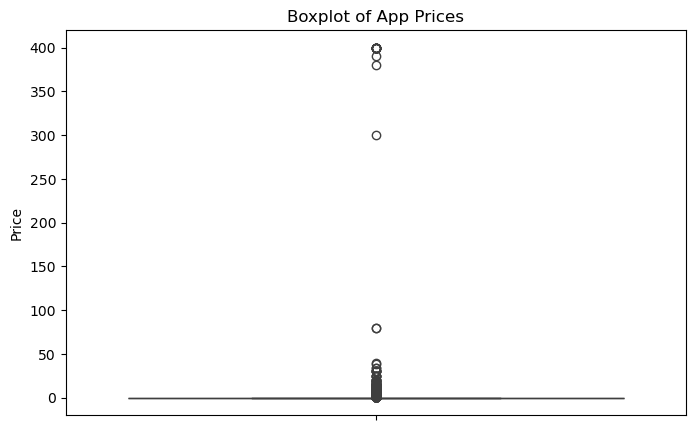

In [40]:
# Boxplot for Price

plt.figure(figsize=(8,5))
sns.boxplot(y=df_clean['Price'])
plt.title("Boxplot of App Prices")
plt.show()

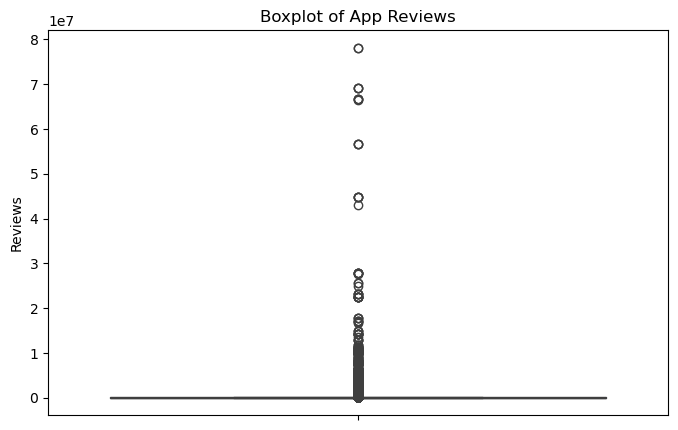

In [41]:
# Boxplot for Reviews

plt.figure(figsize=(8,5))
sns.boxplot(y=df_clean['Reviews'])
plt.title("Boxplot of App Reviews")
plt.show()

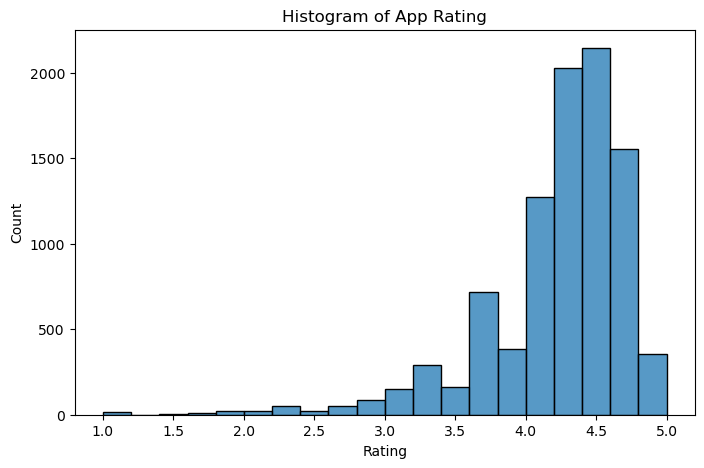

In [42]:
# Histogram for Rating
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Rating'], bins=20, kde=False)
plt.title("Histogram of App Rating")
plt.show()

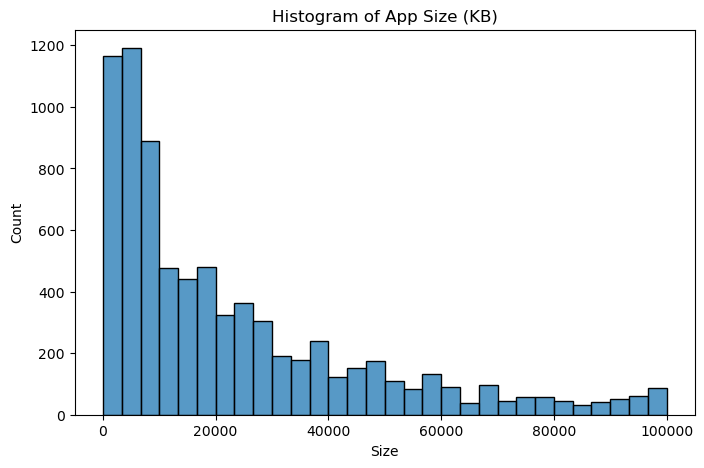

In [43]:
# Histogram for Size
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Size'], bins=30, kde=False)
plt.title("Histogram of App Size (KB)")
plt.show()

In [44]:
# Check apps with very high price
high_price_apps = df_clean[df_clean['Price'] >= 200]
print(high_price_apps[['App', 'Category', 'Price']])

                                 App   Category   Price
4197          most expensive app (H)     FAMILY  399.99
4362                      💎 I'm rich  LIFESTYLE  399.99
4367        I'm Rich - Trump Edition  LIFESTYLE  400.00
5351                       I am rich  LIFESTYLE  399.99
5354                  I am Rich Plus     FAMILY  399.99
5355                   I am rich VIP  LIFESTYLE  299.99
5356               I Am Rich Premium    FINANCE  399.99
5357             I am extremely Rich  LIFESTYLE  379.99
5358                      I am Rich!    FINANCE  399.99
5359              I am rich(premium)    FINANCE  399.99
5362                   I Am Rich Pro     FAMILY  399.99
5364  I am rich (Most expensive app)    FINANCE  399.99
5366                       I Am Rich     FAMILY  389.99
5369                       I am Rich    FINANCE  399.99
5373              I AM RICH PRO PLUS    FINANCE  399.99


In [45]:
df_clean.shape

(9353, 13)

In [46]:
# Dropping the high price Apps
df_clean = df_clean[df_clean['Price'] < 200]
df_clean.shape

(9338, 13)

In [47]:
# Check apps with very high reviews
high_reviews_apps = df_clean[df_clean['Reviews'] > 2_000_000]
print(high_reviews_apps[['App', 'Category', 'Reviews']])

                                            App             Category   Reviews
139                        Wattpad 📖 Free Books  BOOKS_AND_REFERENCE   2914724
335    Messenger – Text and Video Chat for Free        COMMUNICATION  56642847
336                          WhatsApp Messenger        COMMUNICATION  69119316
338                Google Chrome: Fast & Secure        COMMUNICATION   9642995
340                                       Gmail        COMMUNICATION   4604324
...                                         ...                  ...       ...
9166               Modern Combat 5: eSports FPS                 GAME   2903386
9841                               Google Earth     TRAVEL_AND_LOCAL   2339098
10186                          Farm Heroes Saga               FAMILY   7615646
10190                           Fallout Shelter               FAMILY   2721923
10327                          Garena Free Fire                 GAME   5534114

[453 rows x 3 columns]


In [48]:
# Dropping High Review Apps
df_clean = df_clean[df_clean['Reviews'] <= 2000000]
df_clean.shape

(8885, 13)

In [49]:
# Check percentiles of Installs
percentiles = df_clean['Installs'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])
print(percentiles)

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64


In [50]:
# Example: drop apps with installs > 99th percentile
threshold = df_clean['Installs'].quantile(0.99)
df_clean = df_clean[df_clean['Installs'] <= threshold]

In [51]:
df_clean.shape

(8865, 13)

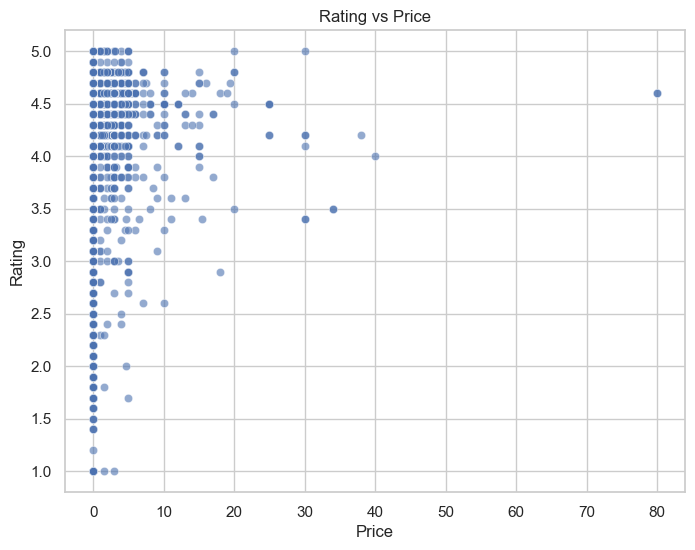

In [52]:
sns.set(style="whitegrid")

# 1. Scatter plot: Rating vs Price
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x="Price", y="Rating", alpha=0.6)
plt.title("Rating vs Price")
plt.show()

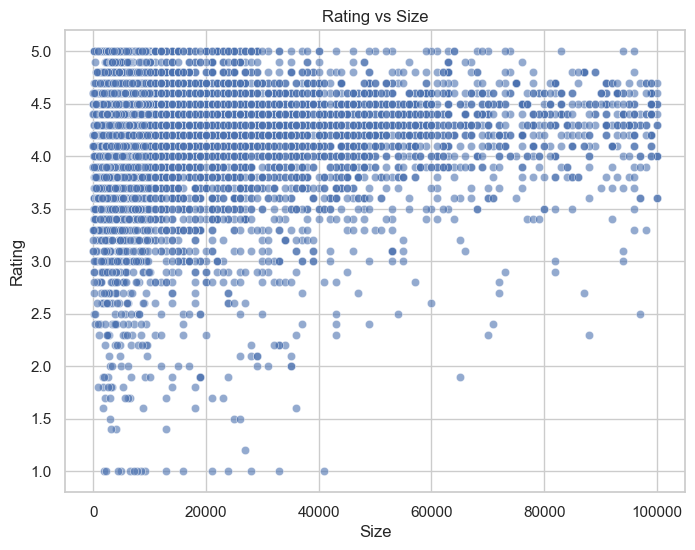

In [53]:
# 2. Scatter plot: Rating vs Size

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x="Size", y="Rating", alpha=0.6)
plt.title("Rating vs Size")
plt.show()

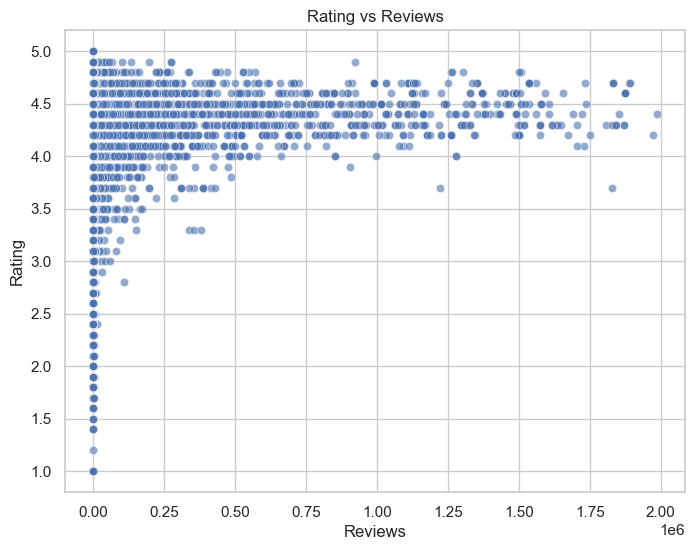

In [54]:
# 3. Scatter plot: Rating vs Reviews

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x="Reviews", y="Rating", alpha=0.6)
plt.title("Rating vs Reviews")
plt.show()

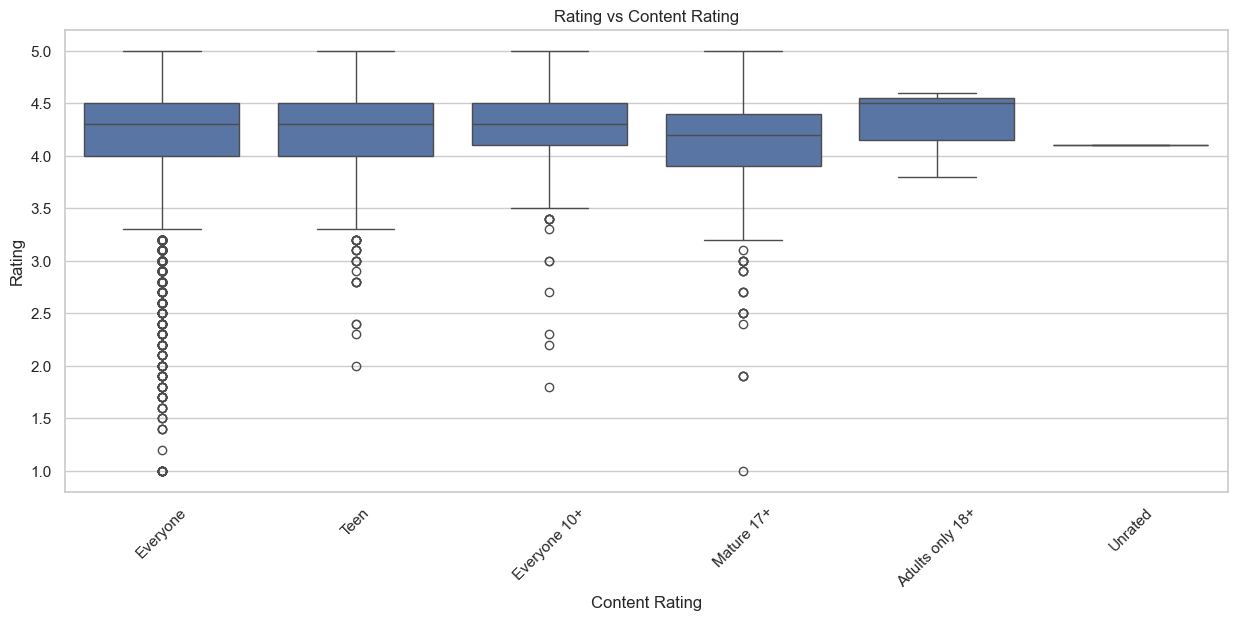

In [55]:
# 4. Boxplot: Rating vs Content Rating

plt.figure(figsize=(15,6))
sns.boxplot(data=df_clean, x="Content Rating", y="Rating")
plt.title("Rating vs Content Rating")
plt.xticks(rotation=45)
plt.show()

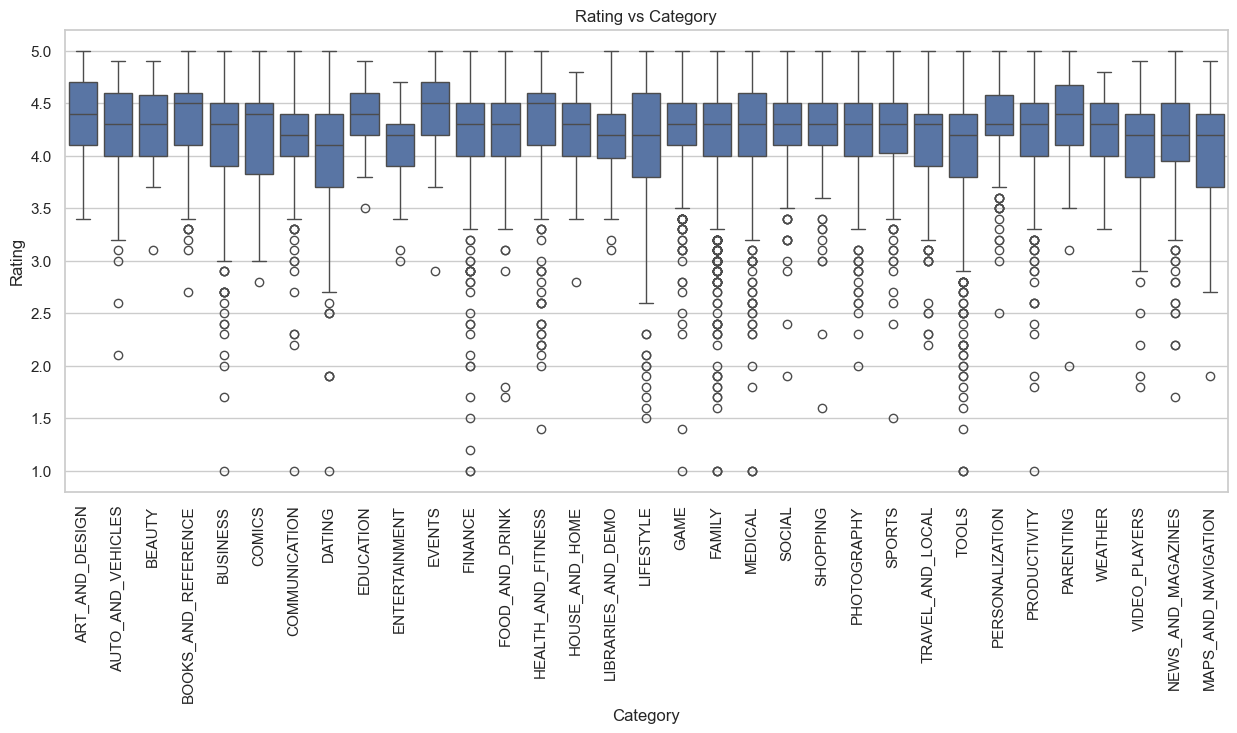

In [56]:
# 5. Boxplot: Rating vs Category

plt.figure(figsize=(15,6))
sns.boxplot(data=df_clean, x="Category", y="Rating")
plt.title("Rating vs Category")
plt.xticks(rotation=90)
plt.show()

In [57]:
# ======================================================
# 8. Data Preprocessing
# ======================================================

# 8.1 Import libraries for preprocessing
import pandas as pd
import numpy as np

# Create a copy of df_clean so original data is not modified
inp1 = df_clean.copy()

# Apply log transformation to reduce skewness in 'Reviews' and 'Installs'
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

# Drop columns that are not useful for prediction
inp1 = inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

# 8.2 Convert categorical variables into dummy/indicator variables
# Dummy encoding for categorical variables - to convert categorical data to numeric - 0 or 1
# drop_first=True avoids the dummy variable trap (removing redundancy).
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating', 'Type'], drop_first=True)

In [58]:
# ======================================================
# 9. Train test split (70-30)
# ======================================================

# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Separate features (X) and target variable (y)
X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

# Handle missing values using median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Split data into training (70%) and testing (30%) sets
df_train, df_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42
)



In [59]:
# ======================================================
# 10. Separate into X_train, y_train, X_test, y_test
# ======================================================

# Assign train and test sets properly
X_train = df_train
X_test = df_test


In [60]:
# ======================================================
# 11. Model Building - Linear Regression
# ======================================================

# Import linear regression model
from sklearn.linear_model import LinearRegression

# Initialize and train the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Import R² score metric
from sklearn.metrics import r2_score

# Evaluate model on training set
y_train_pred = linreg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R² on Training Set:", r2_train)


R² on Training Set: 0.16620877881361085


In [61]:
# ======================================================
# 12. Predictions on Test Set
# ======================================================

# Make predictions on test set
y_test_pred = linreg.predict(X_test)

# Evaluate model on test data
r2_test = r2_score(y_test, y_test_pred)
print("R² on Test Set:", r2_test)

R² on Test Set: 0.12947782885741788
